# Machine Learning Essentials - Summer Semester 2024 // Exercise 01

## Team-Member
### 1. Sushmitha Chandrakumar - 4732591
### 2. Nils-Frederik Schulze - 4240970
### 3. Colin Fredynand

# 1 Exploring the data

## Loading the dataset and extracting the data

In [ ]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()

In [ ]:
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

### index of "target" where digit == 3

In [ ]:
index = list(np.argwhere(target == 3))

In [ ]:
img = data[index[0]].reshape((8,8))
assert 2 == len(img.shape)

## Plotting a 3

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
axes[0].imshow(img, interpolation = "nearest")
axes[1].imshow(img, interpolation = "bicubic")
fig.tight_layout()
axes[0].title.set_text('Nearest')
axes[1].title.set_text('Bicubic')
plt.show()

### Filtering of the dataset, so that only '3' and '9' are remaining

In [ ]:
filter_index = list(np.argwhere((target == 3) | (target == 9)))
data = data[filter_index]
images = images[filter_index] ## check if later needed
target = target[filter_index]

### Splitting the dataset into training and test-data

In [ ]:
from sklearn import model_selection

In [ ]:
X_all = data
y_all = target

In [ ]:
X_train , X_test , y_train , y_test =\
model_selection.train_test_split(data, target, test_size = 0.4, random_state = 0)

# 2 Hand-crafted classifier

## 2.1 Feature construction

In [ ]:
img3 = data[0].reshape((8,8))
img9 = data[1].reshape((8,8))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
axes[0,0].imshow(img3, interpolation = "nearest")
axes[0,1].imshow(img9, interpolation = "nearest")
axes[1,0].imshow(img3, interpolation = "bicubic")
axes[1,1].imshow(img9, interpolation = "bicubic")
axes[0,0].title.set_text('3')
axes[0,1].title.set_text('9')
axes[1,0].title.set_text('3')
axes[1,1].title.set_text('9')
fig.tight_layout()
plt.show()

In [ ]:
def features2d(x):
    features = []
    fatures = np.array(features)
    for i in x:
        i = i.reshape((8,8))
        feature1 = i[3,2]
        feature2 = i[2,2]
        features.append((feature1, feature2))
    return np.array(features)

In [ ]:
features = features2d(X_train)

## 2.2 Scatterplot

In [ ]:
data_3 = features[[i[0] for i in np.argwhere((y_train == 3))]]
data_9 = features[[i[0] for i in np.argwhere((y_train == 9))]]

plt.scatter(x=[i[0] for i in data_3], y = [i[1] for i in data_3], marker = "o")
plt.scatter(x=[i[0] for i in data_9], y = [i[1] for i in data_9], marker = ".")
plt.legend(["3", "9"])
plt.show()

## 2.3 Decision rule

In [ ]:
def predicted_labels(data):
    limit = data_3.mean()+abs(data_3.mean()-data_9.mean())/2
    prediction = []
    for i in data:
        if (i.mean() < limit):
            prediction.append(-1)
        else:
            prediction.append(1)
    return np.array(prediction)

def correct_labels(data):
    labels = []
    for i in data:
        if (i == 3):
            labels.append(-1)
        else:
            labels.append(1)
    return np.array(labels)

### Test error:

In [ ]:
a = features2d(X_test)
predicted_label = predicted_labels(a)
test_labels = correct_labels(y_test)
print("Test Error:", np.mean(predicted_label != test_labels))

### Training error:

In [ ]:
a = features2d(X_train)
predicted_label = predicted_labels(a)
training_labels = correct_labels(y_train)
print("Training Error:", np.mean(predicted_label != training_labels))

## 2.4 Visualize the decision reagions

In [ ]:
## TODO

# 3 LDA

## 3.1 Implement LDA training

In [ ]:
def fit_lda(training_features, training_labels):
    m_1 = np.array([0,0])
    m1 = np.array([0,0])
    covmat_1 = np.matrix([[0,0], [0,0]])
    covmat1 = np.matrix([[0,0], [0,0]])
    N = len(training_features)
    
    ## mu-matrix
    for i in range(N):
        if training_labels[i] == -1:
            m_1 = m_1 + training_features[i]
        else:
            m1 = m1 + training_features[i]
    m_1 = m_1*(1/sum(training_labels == -1))
    m1 = m1*(1/sum(training_labels == 1))
    mu = np.matrix([m_1, m1])
    
    ## covmat 
    for i in range(N):
        if training_labels[i] == -1:
            temp1 = np.matrix(training_features[i]-mu[0])
            covmat_1 = covmat_1 + np.transpose(temp1).dot(temp1)
        else:
            temp1 = np.matrix(training_features[i]-mu[1])
            covmat1 = covmat1 + np.transpose(temp1).dot(temp1)
    covmat = covmat_1 + covmat1
    covmat = covmat/N
    
    ## p, what is p, what are the 'two priors'?
    p = 0
    
    return mu, covmat, p

In [ ]:
training_features = features2d(X_train)
training_labels = correct_labels(y_train)
mu, covmat, p = fit_lda(training_features, training_labels)

## 3.2 Implement LDA prediction

In [ ]:
import math ## for log-function
def predict_lda(mu, covmat, p, test_features, test_labels):
    N1 = sum(test_labels == 1)
    N_1 = sum(test_labels == -1)
    N = N1+N_1
    predicted_labels = []
    
    beta = np.linalg.inv(covmat).dot(np.transpose(mu[1]-mu[0]))
    b = -0.5*(mu[1]+mu[0]).dot(beta)+math.log10(N1/N_1)
    
    for i in test_features:
        predicted_labels.append(sign(i,beta,b))
    return np.array(predicted_labels)

def sign(x,beta,b):
    x = x.dot(beta)+b
    if x > -b:
        return 1
    else:
        return -1

In [ ]:
training_labels = correct_labels(y_train)
training_prediction = predict_lda(mu, covmat, p, training_features, training_labels)
print("Training Error:", np.mean(training_prediction != training_labels))

In [ ]:
test_features = features2d(X_test)
test_labels = correct_labels(y_test)
test_prediction = predict_lda(mu, covmat, p, test_features, test_labels)
print("Test Error:", np.mean(test_prediction != test_labels))

## 4 SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
# Load the dataset
digits = load_digits()

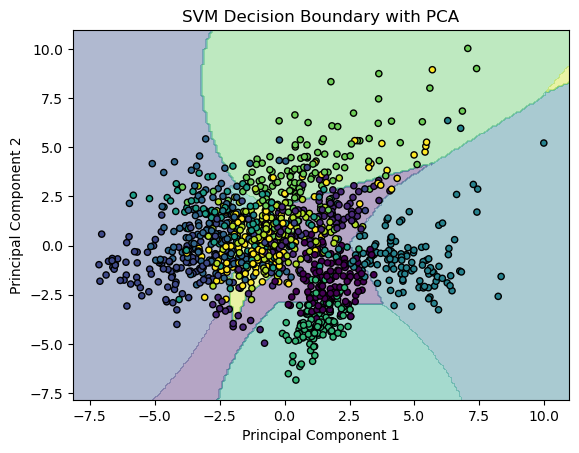

Accuracy: 0.5370370370370371


In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Use PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Fit the SVM classifier
svm = SVC(kernel='rbf', C=1, gamma=0.01)
svm.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_pca)

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary with PCA')
plt.show()

# Evaluate performance
accuracy = svm.score(X_test_pca, y_test)
print(f"Accuracy: {accuracy}")

"""
In this example, we use a linear kernel and set the regularization parameter C to 1.0. The learning rate is initially set to 0.1 and is decreased by a factor of 10 when the training error stagnates. We stop the optimization after 10,000 iterations.

To visualize how the training error changes during optimization, we can create a plot of the training error versus iteration number:
"""

In [7]:
import numpy as np
from sklearn.datasets import load_digits

iteration 100: training error = 0.5041736227045075
iteration 200: training error = 0.5041736227045075
iteration 300: training error = 0.5041736227045075
iteration 400: training error = 0.5041736227045075
iteration 500: training error = 0.5041736227045075
iteration 600: training error = 0.5041736227045075
iteration 700: training error = 0.5041736227045075
iteration 800: training error = 0.5041736227045075
iteration 900: training error = 0.5041736227045075
iteration 1000: training error = 0.5041736227045075
iteration 1100: training error = 0.5041736227045075
iteration 1200: training error = 0.5041736227045075
iteration 1300: training error = 0.5041736227045075
iteration 1400: training error = 0.5041736227045075
iteration 1500: training error = 0.5041736227045075
iteration 1600: training error = 0.5041736227045075
iteration 1700: training error = 0.5041736227045075
iteration 1800: training error = 0.5041736227045075
iteration 1900: training error = 0.5041736227045075
iteration 2000: train

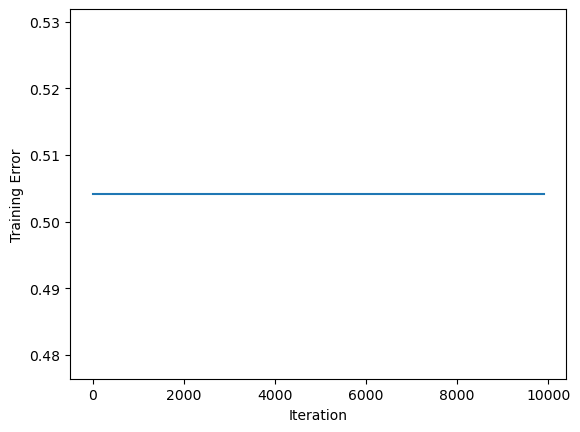

In [10]:
# Load dataset
digits = load_digits()

# Preprocess dataset
X = digits.data
y = digits.target
X = X / 16.0 - 0.5  # normalize X to [-0.5, 0.5]
y[y % 2 == 0] = -1  # make labels -1 (even) and +1 (odd)

# Set up parameters
N = X.shape[0]
D = X.shape[1]
beta = np.random.normal(size=D)
b = 0
tau = 1.0
C = 1.0
T = 10000
lr = 0.1

# Define kernel function (linear kernel)
def kernel(x1, x2):
    return np.dot(x1, x2)

# Define prediction function
def predict(x):
    return np.sign(np.dot(beta, x) + b)

# Define training error function
def training_error():
    y_pred = np.array([predict(x) for x in X])
    return np.sum(y != y_pred) / N

# Perform gradient descent
for t in range(1, T+1):
    # Update learning rate if necessary
    if t % 100 == 0 and training_error() == training_error_prev:
        lr = tau * lr

    # Save previous training error
    training_error_prev = training_error()

    # Compute gradients
    dbeta = np.zeros(D)
    db = 0
    for i in range(N):
        if y[i] * (np.dot(beta, X[i]) + b) < 1:
            dbeta += y[i] * X[i]
            db += y[i]
    dbeta = C * dbeta - 2 * beta / N
    db = C * db

    # Update parameters
    beta -= lr * dbeta
    b -= lr * db

    # Print training error every 100 iterations
    if t % 100 == 0:
        print(f"iteration {t}: training error = {training_error()}")

plt.plot(range(1, T+1, 100), [training_error() for t in range(1, T+1, 100)])
plt.xlabel("Iteration")
plt.ylabel("Training Error")
plt.show()

"""
To use cross-validation to find a good value for the hyperparameter λ in the SVM classifier,
we can split the training set into K folds and use each fold as a validation set while training on the remaining K-1 folds.
We can then average the error over all K folds to estimate the generalization error of the model for a given value of λ.
"""

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [15]:
def fit_svm(x, y, lamb):
    model = SVC(C=1/lamb, kernel='linear')
    model.fit(x, y)
    return model

def predict_svm(model, x):
    return model.predict(x)

In [17]:
def cross_validate_svm(X_train, y_train, lambdas, K):
    kf = KFold(n_splits=K, shuffle=True)
    best_lambda = None
    best_acc = 0.0

    for lambd in lambdas:
        acc_sum = 0.0
        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            beta, b = fit_svm(X_train_fold, y_train_fold, lambd)
            y_pred_fold = predict_svm(beta, b, X_val_fold)
            acc_fold = accuracy_score(y_val_fold, y_pred_fold)
            acc_sum += acc_fold

        acc_avg = acc_sum / K

        if acc_avg > best_acc:
            best_acc = acc_avg
            best_lambda = lambd

    return best_lambda, best_acc

lambdas = [0.01, 0.1, 1.0, 10.0, 100.0]
K = 5
best_lambda, best_acc = cross_validate_svm(X_train, y_train, lambdas, K)
print(f"Best lambda: {best_lambda}, Best accuracy: {best_acc}")

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn accuracy: {acc_sklearn}")

TypeError: cannot unpack non-iterable SVC object